<a href="https://colab.research.google.com/github/ThomasPickle7/ELEC-378/blob/main/Copy_of_ELE_378_HW2_2024_Skeleton_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELEC 378 Homework 2 Skeleton Code

In [ ]:
import scipy.io as sc
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import time
import struct
from PIL import Image

**Question 2**

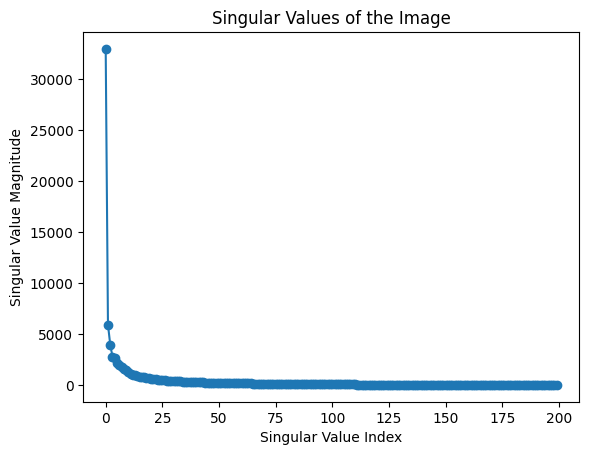

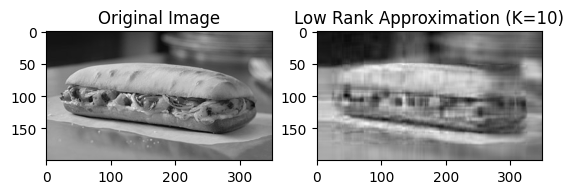

In [ ]:
# Load the image
image_path = "tag-sandwiches-buffalo-chicken.jpg"
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_array = np.array(image)


# Perform Singular Value Decomposition (SVD)
# hint: there is one function you can use that will do the entire SVD for you
U, S, Vt = np.linalg.svd(image_array);


# Plot the singular values
plt.plot(S, marker='o')
plt.title("Singular Values of the Image")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value Magnitude")
plt.show()

# Let K be the rank of the reconstruction
K = 10

# Perform low-rank approximation
S_low_rank = np.copy(S)
# modify S_low_rank here to make it appropriate for low rank approximation
S_k = np.diag(S_low_rank[0:K])

# Reconstruct the image using the modified singular values
image_low_rank = np.matmul(np.matmul(U[:, 0:K], S_k), Vt[0:K, :])

# Display the original and low-rank approximated images
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(image_low_rank, cmap='gray')
plt.title(f"Low Rank Approximation (K={K})")

plt.show()

**Question 4**


In [ ]:
a = sc.loadmat('cauchy_schwarz_decoding.mat')
b = sc.loadmat('cauchy_schwarz_decoding_2.mat')

In [ ]:
chrp = b['chrp']
_, L_chrp = np.shape(chrp)
y2 = np.squeeze(b['y2'])
chrp = np.flip(np.squeeze(chrp),axis=0)
#Find the sequence of inner products between chirp and received signal via convolution:

#YOUR CODE HERE
conv = signal.convolve(y2, chrp)


(632895,) (624704,)
(575552,)


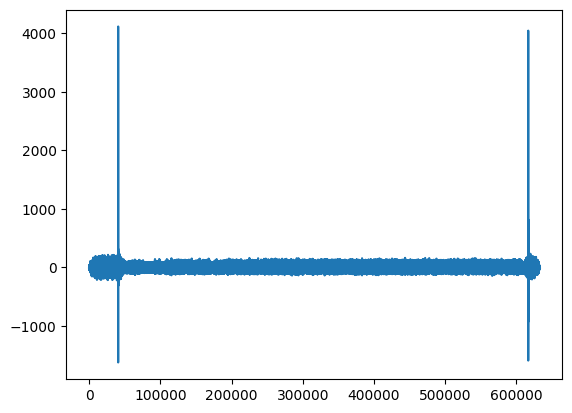

In [ ]:
plt.plot(conv)
# Find peaks in conv to locate chirp start/stop tones and extract the desired signal
print(np.shape(conv), np.shape(y2))
start_point = np.argmax(conv[:300000])
end_point = np.argmax(conv[300000:])
y = y2[start_point:end_point + 300000]
print(y.shape)
# Compute Cauchy-Schwarz inner products

In [ ]:
from scipy.io import loadmat
from scipy.io.wavfile import write
import numpy as np
import IPython

data = loadmat('cauchy_schwarz_decoding.mat')


c0 = data['c0']
c1 = data['c1']

# construct the matrix C which contains as columns the carriers c0 and c1
#Hint: Consider using np.squeeze and np.column_stack.

C = np.column_stack((np.squeeze(c0), np.squeeze(c1)))

# construct the matrix Y which contains as rows the received (noisy) carrier
# tones corresponding to each transmitted bit
# the width of Y should be equal to the length of one carrier tone.

#Hint: Think about how you can reshape y.

# Y_prime = np.rot90(y)
# Specify the desired number of columns
desired_columns = 40

# Calculate the number of entries needed for the matrix to be a multiple of 40
desired_entries = int(np.ceil(y.size / desired_columns) * desired_columns)

# Resize the matrix to have the desired number of entries
resized_matrix = np.resize(y, (1, desired_entries))
print(resized_matrix.shape)
Y = np.reshape(resized_matrix, (-1, 40))
# use matrix multiplication of C and Y to compute the sequence of inner products
# between each received (noisy) carrier tone and each known carrier tone (c0 and c1)
S = np.matmul(Y, C)
# use argmax to decode according to cauchy schwarz
# bits should have shape (N,) where N is the number of decoded bits

bits = np.argmax(np.abs(S), axis=1)


# conversion from binary to uint8
# please feel free to use this code if you're having trouble writing your own
# if you are given any errors, ensure your bits have shape (N,) for appropriate N
strResult = ''.join(str(n) for n in bits)
byteResult = list(int(strResult[i : i+8][::-1], 2) for i in range(0, len(strResult), 8))
arrayResult = np.asarray([byteResult]).astype('uint8')
# writing decoded bits as a .jpg
# include this image in your submission
f = open('decoded.jpg','wb')
f.write(arrayResult)
f.close()

(1, 575560)
